In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv(r'C:\Users\jorda\Documents\School\Senior\Spring 2021\DS340W\Project\Sports-Betting-340W-main\Code\prepped.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,homeTeamPrice,awayTeamPrice
0,0.375354,0.454789,0.785010,0.439960,0.612522,0.278799,0.467391,0.246144,0.617517,0.628440,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,150.0,-166.0
1,0.375354,0.454789,0.785010,0.439960,0.612522,0.278799,0.467391,0.246144,0.617517,0.628440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,-180.0
2,0.375354,0.454789,0.785010,0.439960,0.612522,0.278799,0.467391,0.246144,0.617517,0.628440,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,147.0,-167.0
3,0.625924,0.556777,0.631434,0.273732,0.367364,0.344180,0.308681,0.260137,0.681367,0.796994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,155.0,-180.0
4,0.625924,0.556777,0.631434,0.273732,0.367364,0.344180,0.308681,0.260137,0.681367,0.796994,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,147.0,-167.0


In [4]:
X = df.iloc[:, : 31]
y = df[['homeTeamPrice','awayTeamPrice']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.3, random_state=4)

### Linear Regression

In [24]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = linReg.predict(X_test)
y_pred

array([[-55., -14.],
       [-69.,  -3.],
       [-89.,  22.],
       ...,
       [ -9., -61.],
       [-60.,  -7.],
       [-51., -15.]])

In [27]:
y_multirf = pd.DataFrame(y_pred, columns = ['homeTeamPrice','awayTeamPrice'])

In [9]:
homeRMSE = math.sqrt(mean_squared_error(y_multirf['homeTeamPrice'], y_test['homeTeamPrice']))
homeRMSE

370.9161415583677

In [10]:
awayRMSE = math.sqrt(mean_squared_error(y_multirf['awayTeamPrice'], y_test['awayTeamPrice']))
awayRMSE

360.55017132338884

In [14]:
type(y_multirf['homeTeamPrice'])

pandas.core.series.Series

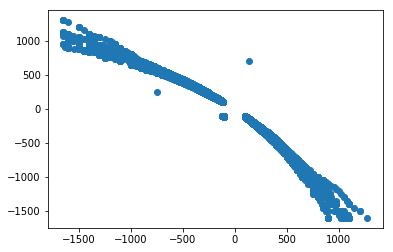

In [28]:
plt.scatter(y_test['homeTeamPrice'], y_test['awayTeamPrice'])

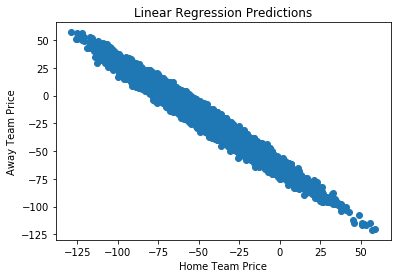

In [30]:
plt.scatter(y_multirf['homeTeamPrice'], y_multirf['awayTeamPrice'])
plt.title("Linear Regression Predictions")
plt.xlabel("Home Team Price")
plt.ylabel("Away Team Price")
plt.show()

In [ ]:
plt.scatter(y_multirf['homeTeamPrice'], y_multirf['awayTeamPrice'],color='red')
plt.scatter(y_test['homeTeamPrice'], y_test['awayTeamPrice'],color='blue')
plt.show()

### RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mae')
forest.fit(X_train, y_train)

In [24]:
y_pred = forest.predict(X_test)
y_pred

array([[ -70.809,  -13.843],
       [ -70.818,   -2.988],
       [ -28.498,  -74.426],
       ...,
       [-100.051,   13.623],
       [ -59.237,  -27.172],
       [-396.929,  255.623]])

In [25]:
y_multirf = pd.DataFrame(y_pred, columns = ['homeTeamPrice','awayTeamPrice'])

In [26]:
homeRMSE = math.sqrt(mean_squared_error(y_multirf['homeTeamPrice'], y_test['homeTeamPrice']))
homeRMSE

355.2201851085292

In [27]:
awayRMSE = math.sqrt(mean_squared_error(y_multirf['awayTeamPrice'], y_test['awayTeamPrice']))
awayRMSE

345.90155228106715

In [ ]:
plt.scatter(y_test['homeTeamPrice'], y_test['awayTeamPrice'])

In [ ]:
plt.scatter(y_multirf['homeTeamPrice'], y_multirf['awayTeamPrice'])

### SGDRegressor

In [6]:
sgd = SGDRegressor()
sgdHome = sgd.fit(X_train, y_train['homeTeamPrice'])
sgdAway = sgd.fit(X_train, y_train['awayTeamPrice'])

In [7]:
y_predHome = sgdHome.predict(X_test)
y_predAway = sgdAway.predict(X_test)

In [8]:
homeRMSE = math.sqrt(mean_squared_error(y_predHome, y_test['homeTeamPrice']))
homeRMSE

372.3537652675711

In [9]:
awayRMSE = math.sqrt(mean_squared_error(y_predAway, y_test['awayTeamPrice']))
awayRMSE

360.38274715023744

In [12]:
y_predHome = sgdHome.predict(X_test)
y_predAway = sgdAway.predict(X_test)

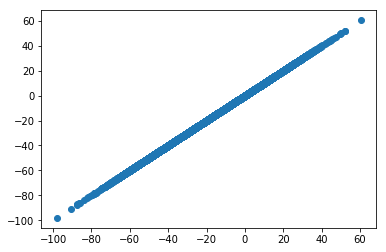

In [21]:
plt.scatter(y_predAway, y_predHome)

In [22]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,homeTeamPrice,awayTeamPrice
count,34845.000000,34845.000000,34845.000000,34845.000000,34845.000000,34845.000000,34845.000000,34845.000000,34845.000000,34845.000000,...,34845.0,34845.0,34845.0,34845.000000,34845.000000,34845.000000,34845.000000,34845.0,34845.000000,34845.000000
mean,0.497761,0.502996,0.360319,0.380039,0.492218,0.461319,0.497628,0.504717,0.511938,0.360973,...,0.0,0.0,0.0,0.177873,0.154341,0.159621,0.155230,0.0,-45.810963,-21.848587
std,0.147111,0.153742,0.203972,0.202273,0.150875,0.162201,0.153810,0.151500,0.165202,0.206430,...,0.0,0.0,0.0,0.382412,0.361280,0.366260,0.362129,0.0,367.499315,357.936821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-1650.000000,-1600.000000
25%,0.401797,0.402320,0.198356,0.220947,0.392246,0.347970,0.391439,0.401813,0.397442,0.198612,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-230.000000,-220.000000
50%,0.497392,0.503807,0.329482,0.358030,0.492066,0.453935,0.494653,0.502895,0.513173,0.327351,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-109.000000,-105.000000
75%,0.595246,0.604318,0.498191,0.513305,0.591948,0.572479,0.594966,0.618230,0.631720,0.498703,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,190.000000,195.000000
max,0.997293,1.000000,0.984839,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1275.000000,1300.000000
